# 교통사고 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_csv('./도로교통공단_전국_사망교통사고정보(2018).csv',engine='python')
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2018,2018021406,35,주,수,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,2018,2018090205,23,야,일,1,1,0,0,0,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,2018,2018121522,35,야,토,1,1,0,0,0,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
3,2018,2018082311,30,주,목,1,1,0,0,0,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
4,2018,2018071600,50,야,월,1,1,0,0,0,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794


In [3]:
data = data.drop(['발생위치X_UTMK','발생위치Y_UTMK'],axis=1)
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,법규위반_대분류,법규위반,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,경도,위도
0,2018,2018021406,35,주,수,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388
1,2018,2018090205,23,야,일,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,126.971732,37.549508
2,2018,2018121522,35,야,토,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,이륜차,이륜차,없음,없음,127.012552,37.591659
3,2018,2018082311,30,주,목,1,1,0,0,0,...,운전자법규위반,기타(운전자법규위반),단일로,기타단일로,승합차,승합차,없음,없음,127.024227,37.631240
4,2018,2018071600,50,야,월,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,127.019590,37.622794


In [4]:
# 각 columns별 levels 확인
print(data['발생년'].unique())
print(data['법규위반_대분류'].unique())
print(data['법규위반'].unique())
print(data['도로형태_대분류'].unique())
print(data['도로형태'].unique())

[2018]
['운전자법규위반' '정비불량']
['안전운전 의무 불이행' '기타(운전자법규위반)' '신호위반' '과속' '보행자 보호의무 위반' '중앙선 침범' '안전거리 미확보'
 '차로위반(진로변경 위반)' '교차로 통행방법 위반' '직진 및 우회전차의 통행방해' '부당한 회전' '앞지르기 방법위반'
 '앞지르기 금지위반' '철길건널목 통과방법위반' '서행 및 일시정지위반' '정비불량 제차의 운전금지위반'
 '긴급자동차에대한 피양의무 위반']
['단일로' '교차로' '기타' '주차장' '불명' '철길건널목']
['기타단일로' '교차로횡단보도내' '교차로내' '교차로부근' '기타' '터널안' '주차장' '지하차도(도로)내' '교량위'
 '고가도로위' '불명' '철길건널목']


In [5]:
data['피해자수'] = data[['사망자수','사상자수','중상자수','경상자수','부상신고자수']].sum(axis=1)
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,법규위반,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,경도,위도,피해자수
0,2018,2018021406,35,주,수,1,1,0,0,0,...,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388,2
1,2018,2018090205,23,야,일,1,1,0,0,0,...,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,126.971732,37.549508,2
2,2018,2018121522,35,야,토,1,1,0,0,0,...,안전운전 의무 불이행,단일로,기타단일로,이륜차,이륜차,없음,없음,127.012552,37.591659,2
3,2018,2018082311,30,주,목,1,1,0,0,0,...,기타(운전자법규위반),단일로,기타단일로,승합차,승합차,없음,없음,127.024227,37.631240,2
4,2018,2018071600,50,야,월,1,1,0,0,0,...,안전운전 의무 불이행,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,127.019590,37.622794,2


### 1. 시도 별 교통사고 피해자수 및 비율
- 인구수가 높을수록 사상자 수가 높지만, 비율상으로 놓고보면 사상자 수가 많다고 교통사고에 취약한 도시라고는 할 수 없다.

In [6]:
a = data.groupby(['발생지시도'])[['피해자수']].sum()
a = a.reset_index()

In [7]:
a = a.rename(columns = {'발생지시도':'시도'})

In [8]:
data2 = pd.read_csv('./도시지역_인구현황_시군구__20190731144832.csv',engine='python')
data2 =data2.iloc[3:,0:2]
data2 = data2.set_index('소재지(시군구)별(1)')

In [9]:
data2 = data2.rename(index = {"서울특별시": "서울",
                     '부산광역시':'부산',
                     '대구광역시':'대구',
                     '인천광역시':'인천',
                     '광주광역시':'광주',
                     '대전광역시':'대전',
                     '울산광역시':'울산',
                      '세종특별자치시':'세종',
                      '경기도':'경기',
                      '강원도':'강원',
                      '충청북도':'충북',
                      '충청남도':'충남',
                      '전라북도':'전북',
                      '전라남도':'전남',
                      '경상북도':'경북',
                      '경상남도':'경남',
                      '제주특별자치도':'제주'
                     }) 

In [10]:
data2 = data2.reset_index()

In [11]:
data2 = data2.rename(columns={'소재지(시군구)별(1)':'시도'})

In [12]:
a

,시도,피해자수
0,강원,572
1,경기,2128
2,경남,944
3,경북,1202
4,광주,222
5,대구,346
6,대전,258
7,부산,376
8,서울,850
9,세종,46


In [13]:
data2

,시도,2018
0,서울,9765623
1,부산,3441453
2,대구,2461769
3,인천,2954642
4,광주,1459336
5,대전,1489936
6,울산,1155623
7,세종,314126
8,경기,13077153
9,강원,1543052


In [14]:
ratio = pd.merge(a,data2, on ="시도", how="inner")

In [15]:
ratio

,시도,피해자수,2018
0,강원,572,1543052
1,경기,2128,13077153
2,경남,944,3373988
3,경북,1202,2676831
4,광주,222,1459336
5,대구,346,2461769
6,대전,258,1489936
7,부산,376,3441453
8,서울,850,9765623
9,세종,46,314126


In [16]:
ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 3 columns):
시도      17 non-null object
피해자수    17 non-null int64
2018    17 non-null object
dtypes: int64(1), object(2)
memory usage: 544.0+ bytes


In [17]:
ratio['2018'] = pd.to_numeric(ratio['2018'])

In [18]:
ratio['비율(%)'] = (ratio['피해자수'] / ratio['2018'])*100

In [19]:
ratio = ratio.set_index('시도')

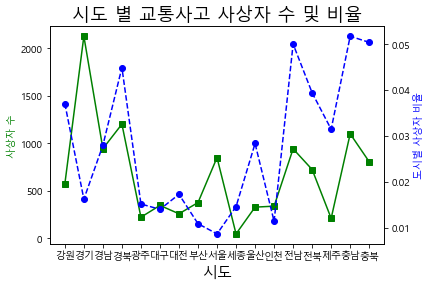

In [20]:
y1 = ratio['피해자수']
y2 = ratio['비율(%)']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(y1, 'g-',marker='s')
ax2.plot(y2, 'b-',marker='o',linestyle='--')

ax1.set_xlabel('시도',fontsize=15)
ax1.set_ylabel('사상자 수', color='g',fontsize=10)
ax2.set_ylabel('도시별 사상자 비율', color='b',fontsize=10)

plt.title('시도 별 교통사고 사상자 수 및 비율',fontsize=18)
plt.rcParams["figure.figsize"] = (13.5,7)
plt.show()

### 2. 법규위반에 따른 교통사고 피해자수
- 안전운전 의무 불이행으로 인한 교통사고 피해자 수가 눈에 뛰게 많음.

In [21]:
b = data.groupby('법규위반')[['피해자수']].sum()

In [22]:
b = b.reset_index()

In [23]:
b = b.sort_values(by=['피해자수'], axis=0,ascending=False)

In [24]:
b.head()

,법규위반,피해자수
9,안전운전 의무 불이행,7256
13,중앙선 침범,1318
7,신호위반,988
0,과속,704
8,안전거리 미확보,312


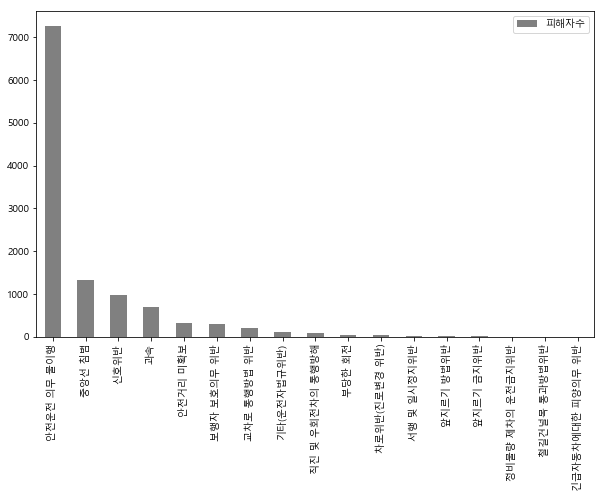

In [25]:
x = range(len(b['피해자수']))
x2 = b['법규위반']

b.plot(kind='bar', figsize=(10,6), color='gray')
plt.xticks(x,x2,rotation=90)
plt.show()

### 2-1. 도로형태 별 법규위반에 따른 교통사고 피해자수
- 단일로 및 교차로 : 위의 결과와 같이 안전운전 의무 불이행으로 인한 사고가 가장 많았다.
- 단일로에서는 안전운전 의무 불이행 다음으로 중앙선 침범이 가장 사고가 많았다.
- 교차로에서는 안전운전 의무 불이행 다음으로 신호위반이 가장 사고가 많았다.

In [26]:
acci_type = data.groupby(['도로형태_대분류','법규위반'])[['피해자수']].sum()

In [27]:
acci_type = acci_type.sort_values(by=['피해자수'], axis=0,ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

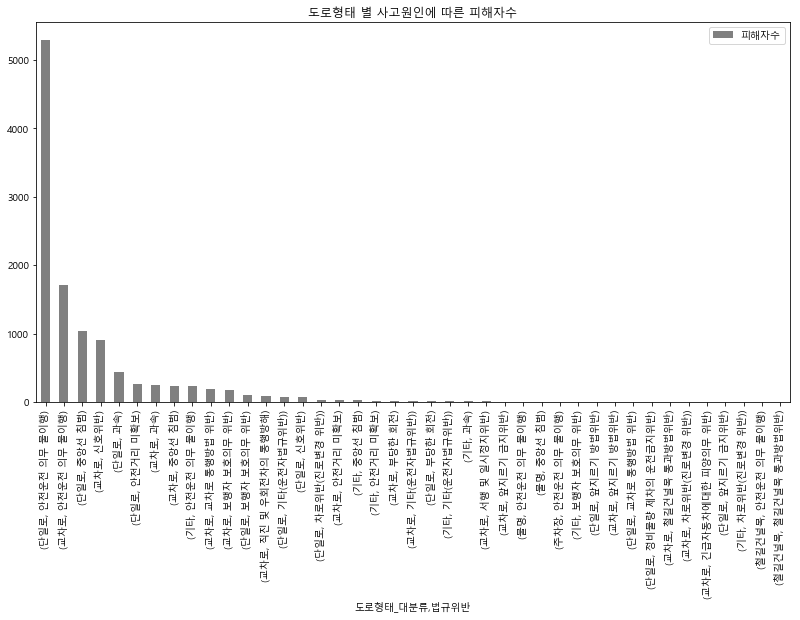

In [28]:
acci_type.plot(kind='bar',color='gray')
plt.title('도로형태 별 사고원인에 따른 피해자수')

plt.show

### 3. 시간별 교통사고 피해자수
- 유동인구가 많은 시간대일수록 교통사고 피해자수도 많은 것을 짐작해볼 수 있다. (정확히는 시간별 유동인구 데이터 필요)

In [29]:
temp = data[['발생년월일시']]

In [30]:
temp.head()

,발생년월일시
0,2018021406
1,2018090205
2,2018121522
3,2018082311
4,2018071600


In [31]:
temp['발생년월일시'] = temp['발생년월일시'].astype(str)

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 1 columns):
발생년월일시    3657 non-null object
dtypes: object(1)
memory usage: 28.6+ KB


In [33]:
temp['year'] = temp.발생년월일시.str[0:4]
temp['month'] = temp.발생년월일시.str[4:6]
temp['date'] = temp.발생년월일시.str[6:8]
temp['time'] = temp.발생년월일시.str[8:10]

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [34]:
temp.head()

,발생년월일시,year,month,date,time
0,2018021406,2018,02,14,06
1,2018090205,2018,09,02,05
2,2018121522,2018,12,15,22
3,2018082311,2018,08,23,11
4,2018071600,2018,07,16,00


In [35]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 5 columns):
발생년월일시    3657 non-null object
year      3657 non-null object
month     3657 non-null object
date      3657 non-null object
time      3657 non-null object
dtypes: object(5)
memory usage: 142.9+ KB


In [36]:
temp['발생년월일시'] = temp['발생년월일시'].astype(int)

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data_new = pd.merge(temp,data, on = "발생년월일시", how="inner")

In [38]:
data_new.head()

,발생년월일시,year,month,date,time,발생년,발생분,주야,요일,사망자수,...,법규위반,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,경도,위도,피해자수
0,2018021406,2018,02,14,06,2018,35,주,수,1,...,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388,2
1,2018021406,2018,02,14,06,2018,45,주,수,1,...,교차로 통행방법 위반,교차로,교차로내,승용차,승용차,승용차,승용차,127.089017,37.806251,8
2,2018021406,2018,02,14,06,2018,35,주,수,1,...,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388,2
3,2018021406,2018,02,14,06,2018,45,주,수,1,...,교차로 통행방법 위반,교차로,교차로내,승용차,승용차,승용차,승용차,127.089017,37.806251,8
4,2018090205,2018,09,02,05,2018,23,야,일,1,...,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,126.971732,37.549508,2


In [39]:
data_new = data_new.drop(['발생년','발생분'], axis=1)    # 분 단위까지는 분석하지 않음.

In [40]:
data_new.head()

,발생년월일시,year,month,date,time,주야,요일,사망자수,사상자수,중상자수,...,법규위반,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,경도,위도,피해자수
0,2018021406,2018,02,14,06,주,수,1,1,0,...,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388,2
1,2018021406,2018,02,14,06,주,수,1,4,0,...,교차로 통행방법 위반,교차로,교차로내,승용차,승용차,승용차,승용차,127.089017,37.806251,8
2,2018021406,2018,02,14,06,주,수,1,1,0,...,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,126.939274,37.590388,2
3,2018021406,2018,02,14,06,주,수,1,4,0,...,교차로 통행방법 위반,교차로,교차로내,승용차,승용차,승용차,승용차,127.089017,37.806251,8
4,2018090205,2018,09,02,05,야,일,1,1,0,...,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,126.971732,37.549508,2


In [41]:
time_accident = data_new.groupby('time')[['피해자수']].sum()

In [42]:
time_accident.head()

,피해자수
time,
00,602
01,324
02,420
03,380
04,470


In [43]:
time_accident.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00 to 23
Data columns (total 1 columns):
피해자수    24 non-null int64
dtypes: int64(1)
memory usage: 384.0+ bytes


In [44]:
time_accident.describe()

,피해자수
count,24.000000
mean,692.083333
std,207.210441
min,324.000000
25%,570.500000
50%,676.000000
75%,834.000000
max,1092.000000


In [45]:
time_accident = time_accident.reset_index()

In [46]:
time_accident.head()

,time,피해자수
0,00,602
1,01,324
2,02,420
3,03,380
4,04,470


[]

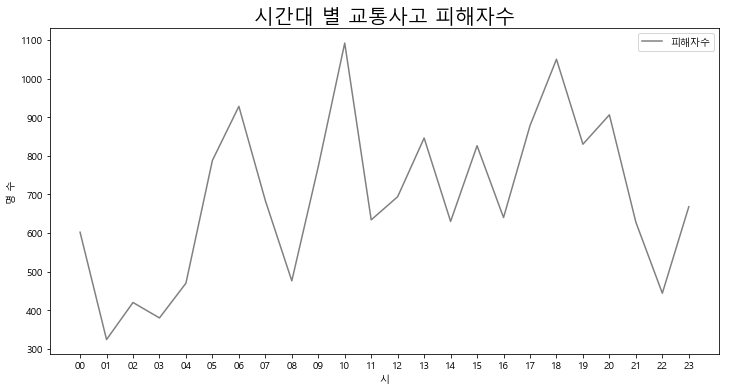

In [47]:
# 시각 별 교통사고 피해자수 graph
x= range(len(time_accident['피해자수']))
x2 = time_accident['time']

time_accident.plot(color="gray",figsize=(12,6))
plt.xticks(x,x2)
plt.xlabel('시')
plt.ylabel('명 수')
plt.title('시간대 별 교통사고 피해자수',fontsize=20)

plt.plot()

### 4. 주야간 별 요일에 따른 교통사고 피해자수
- 모든 요일에서 야간보다는 주간에서 교통사고 피해자수가 높았다.
- 대체적으로 주말보다 평일에서 사고건수가 많게 보인다. (주말에는 집에서의 휴식때문?)

In [48]:
df = data_new.groupby(['주야','요일'])[['피해자수']].sum()

In [49]:
df

피해자수
주야 요일      
야  금   1196
   목   1192
   수   1036
   월    956
   일   1004
   토   1142
   화    984
주  금   1284
   목   1294
   수   1338
   월   1446
   일   1014
   토   1296
   화   1428

In [50]:
df = df.reset_index()
df

,주야,요일,피해자수
0,야,금,1196
1,야,목,1192
2,야,수,1036
3,야,월,956
4,야,일,1004
5,야,토,1142
6,야,화,984
7,주,금,1284
8,주,목,1294
9,주,수,1338


In [51]:
df1 = df[df['주야']=='주']
df2 = df[df['주야']=='야']

In [52]:
df1

,주야,요일,피해자수
7,주,금,1284
8,주,목,1294
9,주,수,1338
10,주,월,1446
11,주,일,1014
12,주,토,1296
13,주,화,1428


In [53]:
df2

,주야,요일,피해자수
0,야,금,1196
1,야,목,1192
2,야,수,1036
3,야,월,956
4,야,일,1004
5,야,토,1142
6,야,화,984


In [54]:
dummy = [5,4,3,1,7,6,2]
df1['dummy'] = dummy

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
df1

,주야,요일,피해자수,dummy
7,주,금,1284,5
8,주,목,1294,4
9,주,수,1338,3
10,주,월,1446,1
11,주,일,1014,7
12,주,토,1296,6
13,주,화,1428,2


In [56]:
df1 = df1.sort_values('dummy')

In [57]:
df1

,주야,요일,피해자수,dummy
10,주,월,1446,1
13,주,화,1428,2
9,주,수,1338,3
8,주,목,1294,4
7,주,금,1284,5
12,주,토,1296,6
11,주,일,1014,7


In [58]:
df1 = df1.drop('dummy',axis=1)

In [59]:
df_merge = pd.merge(df1,df2,on='요일',how='inner')

In [60]:
df_merge

,주야_x,요일,피해자수_x,주야_y,피해자수_y
0,주,월,1446,야,956
1,주,화,1428,야,984
2,주,수,1338,야,1036
3,주,목,1294,야,1192
4,주,금,1284,야,1196
5,주,토,1296,야,1142
6,주,일,1014,야,1004


In [61]:
df_merge = df_merge.rename(columns = {'피해자수_x' : '주간 교통사고 피해자수', '피해자수_y' : '야간 교통사고 피해자수'})

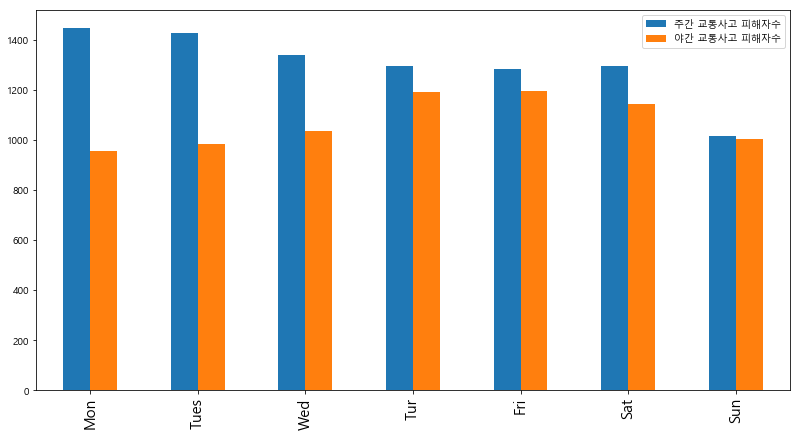

In [62]:
df_merge.plot(kind='bar')

label = ['Mon', 'Tues', 'Wed', 'Tur', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))
plt.xticks(index, label, fontsize=15)


plt.show()

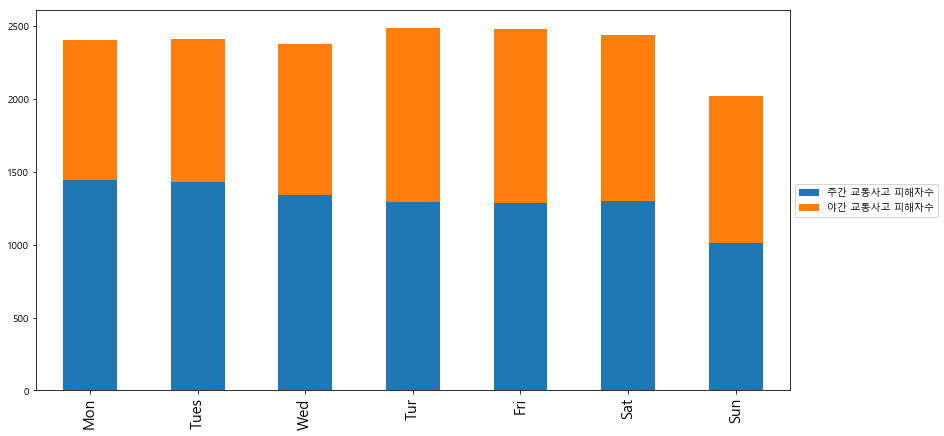

In [63]:
ax = df_merge.plot(kind='bar',stacked=True)

label = ['Mon', 'Tues', 'Wed', 'Tur', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))
plt.xticks(index, label, fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### 4. 1년 간 서울에서 발생한 피해자수에 따른 map시각화
- 정확한 사고 위치가 아닌, 구 별로 피해자수를 표시하였다.
- githack을 통한 link로 folium의 map이 github에서도 보여질 수 있도록 조치하였다.
- [folium github upload 참조](https://github.com/jehyunlee/code-snippet/blob/master/1_folium_geojson/190712_folium_geojson.md)

In [65]:
import folium

In [66]:
seoul_location = pd.read_excel('서울시 행정구역 시군구 정보 (좌표계_ WGS1984).xls')

In [67]:
seoul_location.head()

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155


In [68]:
seoul_location = seoul_location.rename(columns = {'시군구명_한글' : '발생지시군구'})

In [69]:
seoul_location.head()

,순번,시군구코드,발생지시군구,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155


In [70]:
data_map = data[data['발생지시도']=='서울'].loc[:,['발생지시도','발생지시군구','경도','위도','피해자수']]

In [71]:
data_map.head()

,발생지시도,발생지시군구,경도,위도,피해자수
0,서울,서대문구,126.939274,37.590388,2
1,서울,용산구,126.971732,37.549508,2
2,서울,성북구,127.012552,37.591659,2
3,서울,강북구,127.024227,37.631240,2
4,서울,강북구,127.019590,37.622794,2


In [72]:
data_map_group = data_map.groupby('발생지시군구')[['피해자수']].sum()    # 각 구별로 인구에 따른 교통사고 피해자수 비율은 고려하지 않음.

In [73]:
data_map_group.head()

,피해자수
발생지시군구,
강남구,56
강동구,32
강북구,42
강서구,36
관악구,18


In [74]:
data_map_group2 = pd.merge(seoul_location, data_map_group, on='발생지시군구', how='inner')[['발생지시군구','위도','경도','피해자수']]

In [75]:
data_map_group2.head()

,발생지시군구,위도,경도,피해자수
0,도봉구,37.665861,127.031767,12
1,은평구,37.617612,126.922700,26
2,동대문구,37.583801,127.050700,28
3,동작구,37.496504,126.944307,20
4,금천구,37.460097,126.900155,14


In [76]:
data_map_group2 = data_map_group2.set_index('발생지시군구')

In [77]:
data_map_group2.head()

,위도,경도,피해자수
발생지시군구,,,
도봉구,37.665861,127.031767,12
은평구,37.617612,126.922700,26
동대문구,37.583801,127.050700,28
동작구,37.496504,126.944307,20
금천구,37.460097,126.900155,14


In [78]:
for i in data_map_group2.index :
    lat = data_map_group2.loc[i,'위도']     
    lang = data_map_group2.loc[i,'경도']
    
    i = i.strip()
    
    num = data_map_group2.loc[i,'피해자수']
    print(lat,',',lang,',',i, num)

37.6658609 , 127.0317674 , 도봉구 12
37.6176125 , 126.9227004 , 은평구 26
37.5838012 , 127.0507003 , 동대문구 28
37.4965037 , 126.94430729999999 , 동작구 20
37.460096899999996 , 126.90015459999998 , 금천구 14
37.4954856 , 126.858121 , 구로구 34
37.5990998 , 126.98614930000001 , 종로구 16
37.646995399999994 , 127.0147158 , 강북구 42
37.5953795 , 127.0939669 , 중랑구 30
37.4959854 , 127.0664091 , 강남구 56
37.5657617 , 126.8226561 , 강서구 36
37.557945200000006 , 126.99419040000001 , 중구 24
37.549207700000004 , 127.1464824 , 강동구 32
37.5481445 , 127.0857528 , 광진구 34
37.562290600000004 , 126.9087803 , 마포구 24
37.4769528 , 127.03781029999999 , 서초구 70
37.606991 , 127.0232185 , 성북구 34
37.655264 , 127.07712009999999 , 노원구 34
37.5048534 , 127.1144822 , 송파구 120
37.5820369 , 126.93566650000001 , 서대문구 10
37.5270616 , 126.8561534 , 양천구 26
37.520641 , 126.91392420000001 , 영등포구 60
37.465399299999994 , 126.9438071 , 관악구 18
37.550675299999995 , 127.0409622 , 성동구 20
37.5311008 , 126.98107420000001 , 용산구 30


In [79]:
data_map_group2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 도봉구 to 용산구
Data columns (total 3 columns):
위도      25 non-null float64
경도      25 non-null float64
피해자수    25 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.4+ KB


In [80]:
from selenium import webdriver
import time, os

def export_png(m,                     # foium map instance
               html_name,             # str. ex. 'testmap.html'
               png_name='map.png',    # str. ex. 'testmap.png'
               delay=5,               # int or float. ex. 10
              ):
  
  delay=delay
  fn = 'html/' + html_name
  tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
  m.save(fn)

  browser = webdriver.Chrome()
  browser.get(tmpurl)
  
  #Give the map tiles some time to load
  time.sleep(delay)
  browser.save_screenshot('./images/'+png_name)
  browser.quit()

In [81]:
map = folium.Map(location=[37.539912, 126.966762], zoom_start=11.5)  

for i in data_map_group2.index :
    lat = data_map_group2.loc[i,'위도']  
    lang = data_map_group2.loc[i,'경도']
    
    i.strip()
    
    folium.CircleMarker([lat,lang],     
                        radius = int(data_map_group2.loc[i,'피해자수']),
                        popup = int(data_map_group2.loc[i,'피해자수']),   
                        color = 'red',
                        fill = True).add_to(map)

    
export_png(map, 'map.html', 'map.png')  

In [82]:
from IPython.display import Image      # for input image

In [83]:
#Image("images/map.png")   # code안에서 나오게 할 때 
#![koojaekwan](./images/map2.png)  #마크다운에서 나오게 할 때   
#<img src="./images/map.png" width="600" align="left"/>   - github업로드를 위해서는 주소에 githack의 주소를 변환해서 넣어야한다.

Interactive HTML : [link](https://rawcdn.githack.com/koojaekwan/jaekwan-s-python/eb18fc2a92cdae0150e12a84b41fb4ff3aaeb8e8/map.html)

<img src="https://rawcdn.githack.com/koojaekwan/jaekwan-s-python/435f58d35f29609390265ad5c9ea66939b79e9ac/map2.PNG" width="600" align="left"/>